In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv') 
key = pd.read_csv('data/key.csv')

In [4]:
train['logunits'] = np.log1p(train['units'])
test['logunits']=np.nan
test['units']=np.nan
merged = pd.concat([train, test])
merged = merged.sort_values(by=['date','store_nbr','item_nbr'])
merged['date'] = pd.to_datetime(merged['date']) 

In [5]:
weather3 = pd.read_csv('data/weather_m.csv')
weather3['date'] = pd.to_datetime(weather3['date'])

#merged = merged.drop(columns=['year','month','day','week'])
merged = merged.merge(key, how='left', on='store_nbr')
data = merged.merge(weather3, how='left', on=['date', 'station_nbr'])

In [6]:
def get_nonzero_item():
    nonzero_res = {}
    for n in range(1, 46):
        s1 = train[train['store_nbr']==n]
        nonzero = s1.pivot_table(index='item_nbr', aggfunc=np.sum).reset_index()
        nonzero = nonzero[nonzero['units']>0]
        
        nonzero_res[n] = nonzero['item_nbr'].values.tolist()
        #print(n, nonzero['item_nbr'].values)
        
    retailed_items = []
    for store_nbr in range(1, 46): 
        items = nonzero_res[store_nbr]
        res = list(zip([store_nbr] * len(items), items))
        retailed_items.extend(res)
    
    return pd.DataFrame(retailed_items, columns=['store_nbr','item_nbr'])

retailed_items = get_nonzero_item()
retailed_items['t']=1
retailed_items

,store_nbr,item_nbr,t
0,1,9,1
1,1,28,1
2,1,40,1
3,1,47,1
4,1,51,1
5,1,89,1
6,1,93,1
7,1,99,1
8,2,5,1
9,2,11,1


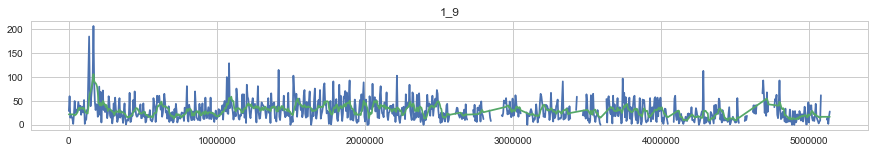

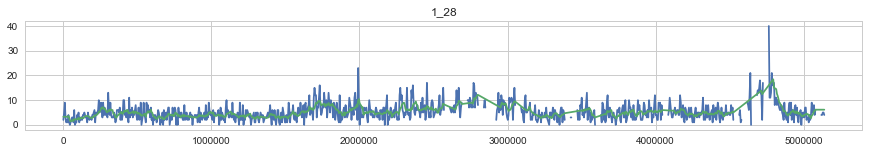

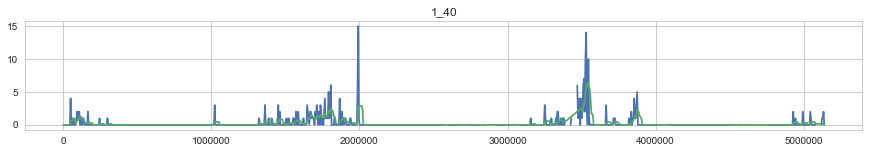

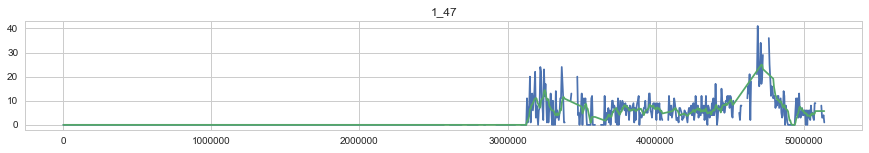

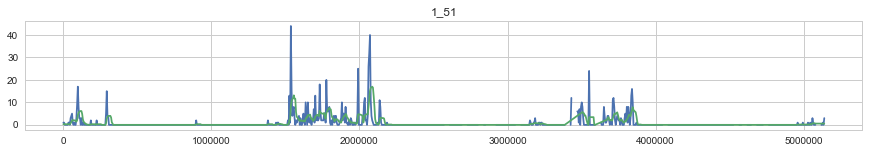

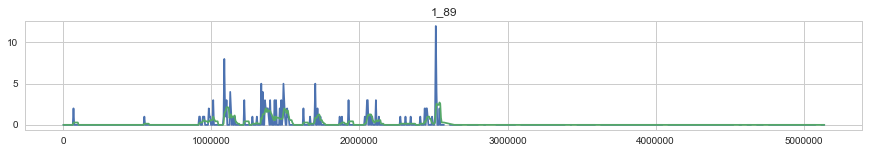

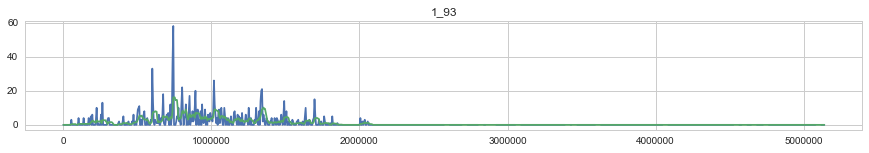

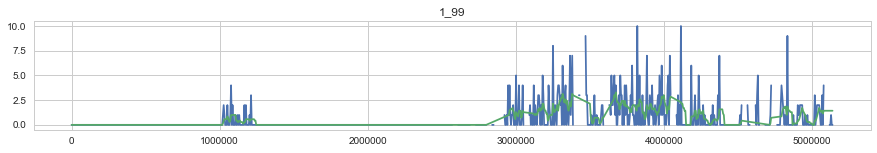

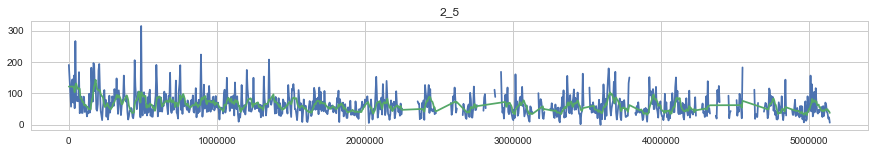

In [9]:
window=7

for idx in range(len(retailed_items)):
    row = retailed_items.iloc[idx]
    store_nbr = row['store_nbr']
    item_nbr = row['item_nbr']
     
    s1_9 = data[(data['store_nbr']==store_nbr) & (data['item_nbr']==item_nbr)]

    timedata =s1_9.units 
    test = pd.rolling_mean(timedata, window=window)
    test = test.interpolate()
    test = test.ffill()
    test = test.bfill()

    plt.figure(figsize=(15, 2))
    plt.plot(timedata)
    plt.plot(test)
    plt.title('{}_{}'.format(store_nbr, item_nbr))
    plt.show()
    
    if store_nbr != 1:
        break
    